Number of items is:  100
Capacity:            995
Best fitness: 83667609
Best knapsack cost: 9147
Best individual: [0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Total generations : 4000
Population size : 200


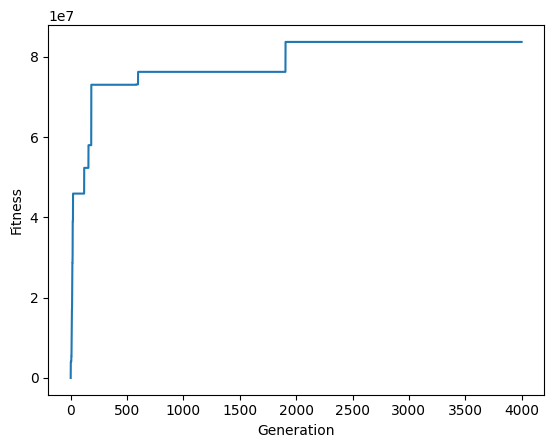

In [14]:
import numpy as np
import random
import copy
import matplotlib.pyplot as plt



class Item:
    def __init__(self, price, weight):
        self.price = price
        self.weight = weight

file_path = "./input_100.txt"

with open(file_path, "r") as file:
    content = file.readlines()


first_line = content[0].strip().split()

number_of_items = int(first_line[0])
knapsack_capacity = int(first_line[1])

items = []



print("Number of items is: ", number_of_items)
print("Capacity:           ", knapsack_capacity)

# parse file into list of custom Item objects
for line in content[1:]:
    numbers = line.strip().split()
    item_cost, item_weight = map(int, numbers)
    items.append(Item(item_cost, item_weight))

assert len(items) == number_of_items


def random_population(population_size):
    #return list(np.random.choice([0, 1], size=(population_size, number_of_items), replace=True, p=[18/20, 2/20]))
    return np.zeros((population_size, number_of_items), dtype=int)


def fitness(individual, items):
    cost = np.dot(individual, [item.price for item in items])
    weight = np.dot(individual, [item.weight for item in items])

    if(weight > knapsack_capacity):
        return 0
    else:
        return cost ** 2



def cost(individual, items):
    cost = np.dot(individual, [item.price for item in items])
    weight = np.dot(individual, [item.weight for item in items])

    if(weight > knapsack_capacity):
        return 0
    else:
        return cost


# Tournament selection with elitism (adds the elite as the last selected individual)
def selection(population, fitness_value, k=3):
    contestant_indices = np.random.choice(len(population), size=(len(population) - 1, k))
    fitness_value = np.array(fitness_value)
    best_individual = population[np.argmax(fitness_value)]
    newpop = [population[tournament_round[np.argmax(fitness_value[tournament_round])]] for tournament_round in contestant_indices] + [population[np.argmax(fitness_value)]]
    newpop[0] = copy.deepcopy(best_individual)
    return newpop

# One-point crossover with elitism (the last individual is the elite)
def crossover(population, crossover_prob=1):
    new_population = []
    for i in range(1, len(population) // 2):
        individual1 = population[2*i]
        individual2 = population[2*i+1]
        
        if random.random() < crossover_prob:
            # We randomly choose the crossover index
            crossover_point = random.randint(1, len(individual1)-1)
            
            # np.concatanate creates a new array, hence there is no need for the deepcopying
            new_individual1 = np.concatenate([individual1[:crossover_point], individual2[crossover_point:]], axis=0)
            new_individual2 = np.concatenate([individual2[:crossover_point], individual1[crossover_point:]], axis=0)
            
        else:
            new_individual1 = individual1
            new_individual2 = individual2

        new_population.append(new_individual1)
        new_population.append(new_individual2)
        
    new_population.extend(population[-2:])
        
    return new_population


# Bit-flip mutation with elitism (the last individual is the elite)
def mutation(population, individual_mutation_prob=0.1):
    new_population = []
    
    for i in range(len(population) - 1):
        individual = population[i]
        
        if random.random() < individual_mutation_prob:
            individual = copy.deepcopy(individual)
            
            for i in range(len(individual)):
                if np.random.rand() < (1/ len(individual)) * 2:
                    individual[i] = 1 - individual[i]
                        
        new_population.append(individual)
        
    new_population.append(population[-1])
        
    return new_population


# Evolution minimizing the fitness (absolute value of the difference of the sum and the desired value)
def evolution(population_size, max_generations):
    best_fitness = []
    population = random_population(population_size)
    
    for _ in range(max_generations):
        fitness_value = list(map(fitness, population, [items]*population_size))        
        best_fitness.append(max(fitness_value))
        
        parents = selection(population, fitness_value)
        children = crossover(parents)
        mutated_children = mutation(children)
        
        population = mutated_children
        
    # We compute fitness for the last population and obtain the best individual
    fitness_value = list(map(fitness, population, [items]*population_size))
    best_fitness.append(max(fitness_value))
    best_individual = population[np.argmax(fitness_value)]
    
    # We return our solution (the best individual), the last population and the best fitnesses observed during the algorithm run for logging purposes
    return best_individual, population, best_fitness

max_generations=4000
population_size=200

best, population, best_fitness = evolution(population_size, max_generations)



print("Best fitness:", fitness(best, items))
print("Best knapsack cost:", cost(best, items))
print("Best individual:", best)
print("Total generations :", max_generations)
print("Population size :", population_size)

plt.plot(best_fitness)
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.show()